[View in Colaboratory](https://colab.research.google.com/github/marcelcerri/Hello-world/blob/master/importando_dados_coolab_concentracao.ipynb)

In [0]:
import pandas as pd
from google.colab import files
import io
from scipy import stats
from scipy.interpolate import *
import numpy as np

In [55]:
uploaded = files.upload()

Saving calibracao.csv to calibracao (2).csv


In [56]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "calibracao.csv" with length 108 bytes


In [57]:
uploaded

{'calibracao.csv': b'concentracao,absorbancia\r\n0,0\r\n1,1.9\r\n2,4.2\r\n3,6.2\r\n4,7.8\r\n5,10.2\r\n6,11.8\r\n7,13.8\r\n8,16.2\r\n9,18.2\r\n10,19.8\r\n'}

In [0]:
calibracao_df = pd.read_csv(io.StringIO(uploaded['calibracao.csv'].decode('utf-8')))

In [59]:
calibracao_df

,concentracao,absorbancia
0,0,0.0
1,1,1.9
2,2,4.2
3,3,6.2
4,4,7.8
5,5,10.2
6,6,11.8
7,7,13.8
8,8,16.2
9,9,18.2


In [0]:
calibracao_np = calibracao_df.values

In [61]:
calibracao_np

array([[ 0. ,  0. ],
       [ 1. ,  1.9],
       [ 2. ,  4.2],
       [ 3. ,  6.2],
       [ 4. ,  7.8],
       [ 5. , 10.2],
       [ 6. , 11.8],
       [ 7. , 13.8],
       [ 8. , 16.2],
       [ 9. , 18.2],
       [10. , 19.8]])

In [62]:
print(calibracao_np[:,0])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [63]:
print(calibracao_np[:,1])

[ 0.   1.9  4.2  6.2  7.8 10.2 11.8 13.8 16.2 18.2 19.8]


In [64]:
linear_p = np.polyfit(calibracao_np[:,0], calibracao_np[:,1], 1)
print(linear_p)

[1.99454545 0.03636364]


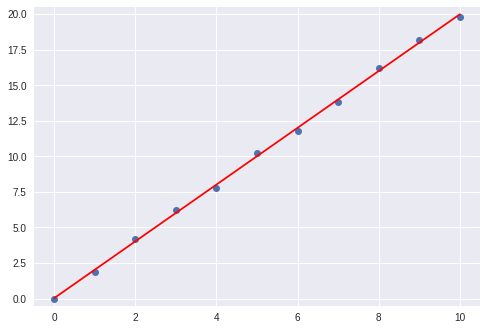

In [65]:
import matplotlib.pyplot as plt
plt.plot(calibracao_np[:,0], calibracao_np[:,1], "o")
plt.plot(calibracao_np[:,0], np.polyval(linear_p, calibracao_np[:,0]), "-r")
plt.axis([-0.5, 10.5, -0.5, 20.5])
plt.show()

In [0]:
#tratamento estatístico do ajuste
slope, intercept, r_value, p_value, std_err = stats.linregress(calibracao_np[:,0], calibracao_np[:,1])

In [67]:
#coeficiente de correlação
print(r_value)

0.9995822826203034


In [68]:
#Standard error of the estimated gradient
print(std_err)

0.01922272912382097
